<a href="https://colab.research.google.com/github/srilamaiti/ml_works/blob/main/review_comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers
!pip install -U sentence-transformers
!pip install bertopic==0.14.1
!pip install bertopic[flair]
!pip install bertopic[gensim]
!pip install bertopic[spacy]
!pip install bertopic[use]
!pip install emoji
!pip install advertools
!pip install hdbscan
#!pip uninstall umap
#!pip install umap-learn==0.5.3
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached protobuf-3.20.2-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.1 MB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.22.3
    Uninstalling protobuf-4.22.3:
      Successfully uninstalled protobuf-4.22.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.
tensor

In [2]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Embedding, Input, Dense, Lambda
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K
from transformers import BertTokenizer, TFBertModel

import sklearn as sk
import os
import nltk
from nltk.data import find

import seaborn as sns
import matplotlib.pyplot as plt

import re
import string
import advertools as adv
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [3]:
df = pd.read_csv("comments.csv")
df

,Business Unit Name,EVP,Facility Type,District,Comment Language,Original Comment Text,English Comment,Compound Sentiment Score,Overall Sentiment,spl_char_chk,deEmojify_text,emoji_present_flag,all_punct_chk,english_comment_length
0,05R-Denver,"Griffith, Kelly",OF,60,en,I can step down and go back to being a pharmac...,I can step down and go back to being a pharmac...,-0.6908,Negative,False,I can step down and go back to being a pharmac...,False,False,277
1,05R-Denver,"Griffith, Kelly",OF,60,en,I have worked more hours than I would have lik...,I have worked more hours than I would have lik...,-0.4005,Negative,False,I have worked more hours than I would have lik...,False,False,278
2,05R-Denver,"Griffith, Kelly",OF,60,en,"Corporate SLT ""Thank You"" for implementing “Li...","Corporate SLT ""Thank You"" for implementing “Li...",-0.0258,Negative,False,"Corporate SLT ""Thank You"" for implementing “Li...",False,False,458
3,05R-Denver,"Griffith, Kelly",OF,60,en,We have made incredible strides in the Denver ...,We have made incredible strides in the Denver ...,0.0258,Positive,False,We have made incredible strides in the Denver ...,False,False,296
4,05R-Denver,"Griffith, Kelly",OF,60,en,"Work on benefits, seems poorer every year.","Work on benefits, seems poorer every year.",0.0258,Positive,False,"Work on benefits, seems poorer every year.",False,False,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58210,United,NaN,NaN,NaN,en,This is an amazing company to work with. In ou...,This is an amazing company to work with. In ou...,0.9947,Positive,False,This is an amazing company to work with. In ou...,False,False,1068
58211,United,NaN,NaN,NaN,en,"ever since I started working here, I have neve...","ever since I started working here, I have neve...",0.9949,Positive,False,"ever since I started working here, I have neve...",False,False,896
58212,United,NaN,NaN,NaN,en,Very good at working with request for days off...,Very good at working with request for days off...,0.9971,Positive,False,Very good at working with request for days off...,True,False,3213
58213,United,NaN,NaN,NaN,en,"I love working at my job it’s my happy place, ...","I love working at my job it’s my happy place, ...",0.9977,Positive,False,"I love working at my job it’s my happy place, ...",False,False,781


In [46]:
df["Overall Sentiment"].value_counts()

Positive    44748
Negative     7913
Neutral      5554
Name: Overall Sentiment, dtype: int64

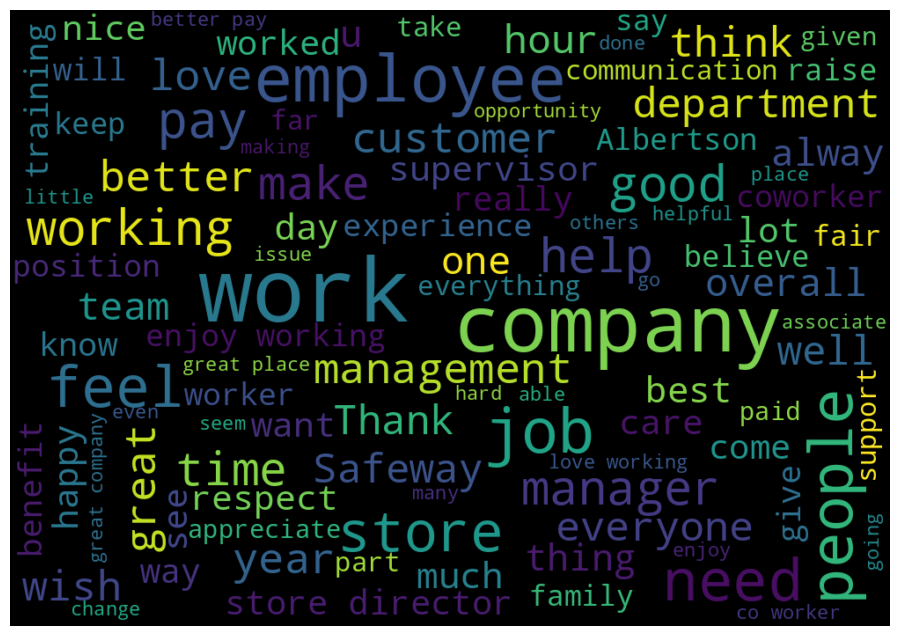

In [41]:
pos_txt = ' '.join(rev for rev in df[df["Overall Sentiment"] == "Positive"]["deEmojify_text"] )

plt.figure(figsize=(15, 8))

pos_wordcloud = WordCloud(
    background_color='black',
    max_font_size=100,
    max_words=100, 
    width=1000, 
    height=700
).generate(pos_txt)

plt.imshow(pos_wordcloud, interpolation='bilinear')

plt.axis('off')

plt.show()

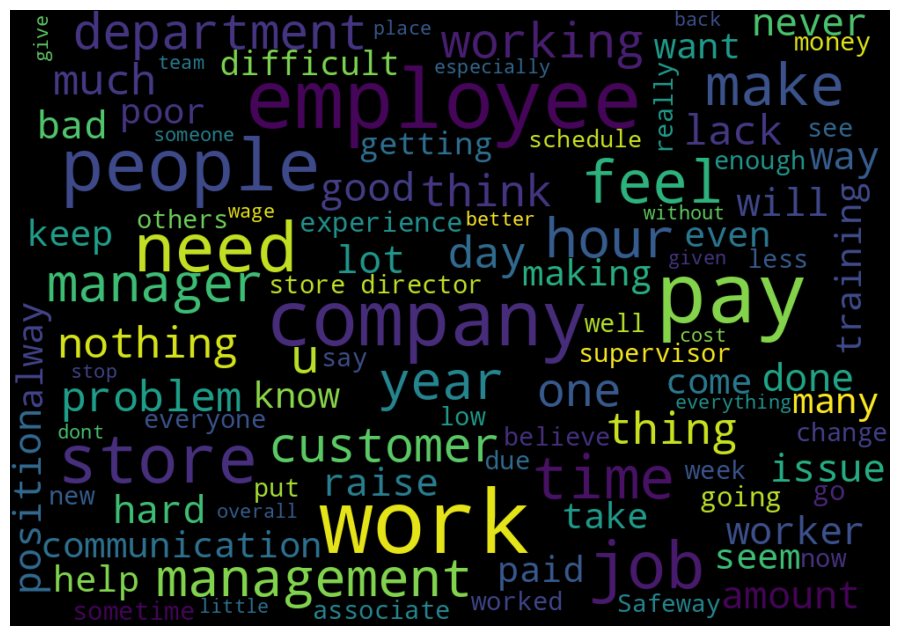

In [42]:
neg_txt = ' '.join(rev for rev in df[df["Overall Sentiment"] == "Negative"]["deEmojify_text"] )

plt.figure(figsize=(15, 8))

neg_wordcloud = WordCloud(
    background_color='black',
    max_font_size=100,
    max_words=100, 
    width=1000, 
    height=700
).generate(neg_txt)

plt.imshow(neg_wordcloud, interpolation='bilinear')

plt.axis('off')

plt.show()

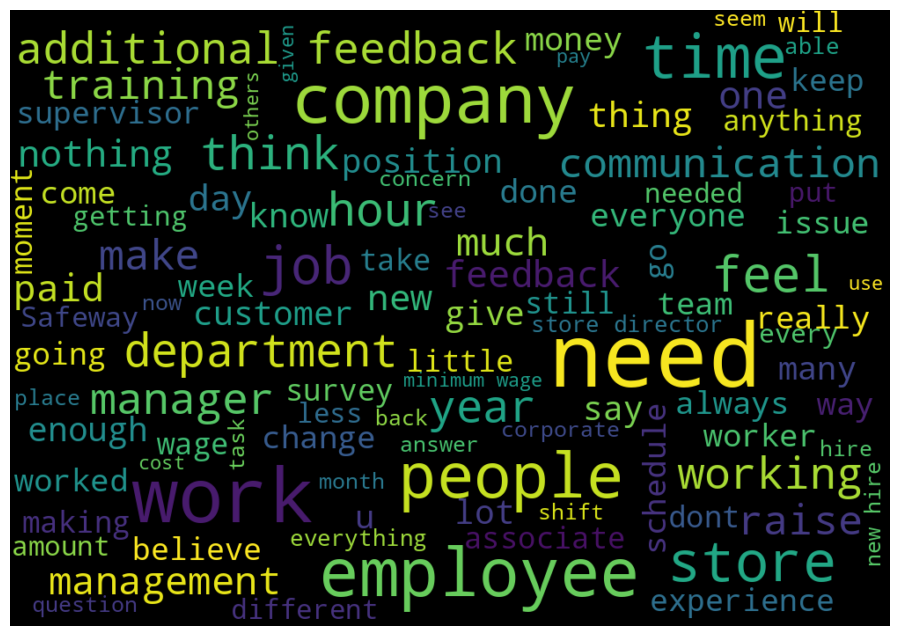

In [43]:
neu_txt = ' '.join(rev for rev in df[df["Overall Sentiment"] == "Neutral"]["deEmojify_text"] )

plt.figure(figsize=(15, 8))

neu_wordcloud = WordCloud(
    background_color='black',
    max_font_size=100,
    max_words=100, 
    width=1000, 
    height=700
).generate(neu_txt)

plt.imshow(neu_wordcloud, interpolation='bilinear')

plt.axis('off')

plt.show()

In [48]:
from bertopic import BERTopic
from umap.umap_ import UMAP
from hdbscan import HDBSCAN
from bertopic.vectorizers import ClassTfidfTransformer

umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine')
hdbscan_model = HDBSCAN(min_cluster_size=15, metric='euclidean', cluster_selection_method='eom', prediction_data=True)
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)

pos_topic_model = BERTopic(hdbscan_model=hdbscan_model,umap_model=umap_model, ctfidf_model=ctfidf_model,language="english", calculate_probabilities=True, verbose=True, nr_topics="auto")
neg_topic_model = BERTopic(hdbscan_model=hdbscan_model,umap_model=umap_model, ctfidf_model=ctfidf_model,language="english", calculate_probabilities=True, verbose=True, nr_topics="auto")

pos_comment_text = df[df["Overall Sentiment"] == "Positive"]['deEmojify_text'].values.tolist()
neg_comment_text = df[df["Overall Sentiment"] == "Negative"]['deEmojify_text'].values.tolist()

pos_headline_topics, pos_probs = pos_topic_model.fit_transform(pos_comment_text)
neg_headline_topics, neg_probs = neg_topic_model.fit_transform(neg_comment_text)


INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda


Batches:   0%|          | 0/1399 [00:00<?, ?it/s]

2023-04-29 02:33:55,867 - BERTopic - Transformed documents to Embeddings
2023-04-29 02:34:17,960 - BERTopic - Reduced dimensionality
2023-04-29 02:37:02,443 - BERTopic - Clustered reduced embeddings
2023-04-29 02:37:07,435 - BERTopic - Reduced number of topics from 235 to 206
INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda


Batches:   0%|          | 0/248 [00:00<?, ?it/s]

2023-04-29 02:37:11,547 - BERTopic - Transformed documents to Embeddings
2023-04-29 02:37:20,259 - BERTopic - Reduced dimensionality
2023-04-29 02:37:22,427 - BERTopic - Clustered reduced embeddings
2023-04-29 02:37:23,617 - BERTopic - Reduced number of topics from 70 to 47


In [49]:
pos_freq = pos_topic_model.get_topic_info()
print("Number of topics: {}".format( len(pos_freq)))
pos_freq.head()

Number of topics: 206


,Topic,Count,Name
0,-1,17393,-1_hours_higher_paid_living
1,0,5475,0_director_she_he_her
2,1,1861,1_safeway_safeways_career_worked
3,2,1408,2_place_recommend_its_fun
4,3,1069,3_raise_raises_minimum_wage


In [50]:
neg_freq = neg_topic_model.get_topic_info()
print("Number of topics: {}".format( len(neg_freq)))
neg_freq.head()

Number of topics: 47


,Topic,Count,Name
0,-1,3662,-1_management_their_employees_who
1,0,925,0_higher_pay_living_hires
2,1,298,1_none_nothing_everything_great
3,2,225,2_she_he_director_her
4,3,222,3_hours_cut_cutting_cuts


In [61]:
for i in range(len(pos_freq)):
    print(pos_topic_model.get_topic(pos_freq.iloc[i]["Topic"]))
    print("***")

[('hours', 0.06275895201469425), ('higher', 0.06230598865241343), ('paid', 0.06190808252658618), ('living', 0.061750266260480725), ('little', 0.06147872696519116), ('fair', 0.06143570524243587), ('rate', 0.06139059199791211), ('coworkers', 0.06123466184875054), ('enough', 0.061210132686396114), ('wage', 0.0612012005442435)]
***
[('director', 0.12369194988310858), ('she', 0.11690545935999723), ('he', 0.11207945808498646), ('her', 0.10976997967009716), ('his', 0.1054946299977582), ('supervisor', 0.09706317766412924), ('him', 0.09561494648570988), ('assistant', 0.09185648679642998), ('stores', 0.09124903788060797), ('manager', 0.0901374584167043)]
***
[('safeway', 0.2353801088928925), ('safeways', 0.09935772888212123), ('career', 0.0842072395621269), ('worked', 0.07939942144954017), ('family', 0.07852653084634395), ('ive', 0.07817254167827702), ('thankful', 0.07676796938093358), ('grateful', 0.07575044871892372), ('years', 0.07446585802898326), ('enjoyed', 0.0742793504844679)]
***
[('plac

In [51]:
for i in range(len(neg_freq)):
    print(neg_topic_model.get_topic(neg_freq.iloc[i]["Topic"]))
    print("***")

[('management', 0.12896457632427555), ('their', 0.12518488575349143), ('employees', 0.12354176609813261), ('who', 0.12318954689317087), ('people', 0.12288770419559132), ('they', 0.122849087755344), ('job', 0.12187330857413123), ('or', 0.1216513577215022), ('here', 0.12110067548534273), ('company', 0.12061860892401988)]
***
[('higher', 0.18228483495484724), ('pay', 0.16327411531183553), ('living', 0.15777908605308738), ('hires', 0.1547670429580617), ('stores', 0.1515567318849626), ('rate', 0.1503491367405581), ('years', 0.146203018473854), ('amount', 0.14608998764864434), ('favoritism', 0.14525459483034747), ('warehouse', 0.14419268307150948)]
***
[('none', 0.7474026495115177), ('nothing', 0.6302333192755305), ('everything', 0.5077798145252445), ('great', 0.45874878779972633), ('good', 0.4336665280689051), ('thank', 0.4158607612631888), ('love', 0.38871297437549884), ('moment', 0.37762898276201595), ('happy', 0.34767862409775574), ('satisfied', 0.3370812284171605)]
***
[('she', 0.360014

In [52]:
pos_topic_model.visualize_barchart(top_n_topics=10)

In [53]:
neg_topic_model.visualize_barchart(top_n_topics=10)

In [54]:
pos_topic_model.visualize_topics()

In [55]:
neg_topic_model.visualize_topics()

In [56]:
pos_topic_model.visualize_hierarchy(top_n_topics=10)

In [57]:
neg_topic_model.visualize_hierarchy(top_n_topics=10)

In [58]:
pos_similar_topics, pos_similarity = pos_topic_model.find_topics("pay", top_n = 5)
pos_similar_topics 

[20, -1, 3, 43, 91]

In [59]:
pos_freq[pos_freq["Topic"].isin(pos_similar_topics)]

,Topic,Count,Name
0,-1,17393,-1_hours_higher_paid_living
4,3,1069,3_raise_raises_minimum_wage
21,20,217,20_paid_payment_brain_got
44,43,119,43_union_dues_join_fund
92,91,58,91_incentives_unreliable_slack_rewarded


In [60]:
pos_most_similar = pos_similar_topics[0]
print("Most Similar Topic Info: \n{}".format(pos_topic_model.get_topic(pos_most_similar)))
print("Similarity Score: {}".format(pos_similarity[0]))

Most Similar Topic Info: 
[('paid', 0.25349827065251446), ('payment', 0.2446130593152246), ('brain', 0.19836062406935673), ('got', 0.1896902337726668), ('higher', 0.18525827491086577), ('moneyincrease', 0.18441041379316112), ('mony', 0.18441041379316112), ('disbelive', 0.18441041379316112), ('salarry', 0.18441041379316112), ('paydiverse', 0.18441041379316112)]
Similarity Score: 0.771855736900779
